# 1. Predicting Parkinson's Disease
## 1.1. Introduction
Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

## 1.2 Context
Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a medical professional.

## 1.3 Domain: Healthcare

## 1.4 Dataset Description
This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.

The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around six recordings per patient, the name of the patient is identified in the first column.For further information or to pass on comments, please contact Max Little (littlem '@' robots.ox.ac.uk).

Further details are contained in the following reference -- if you use this dataset, please cite:
Max A. Little, Patrick E. McSharry, Eric J. Hunter, Lorraine O. Ramig (2008), 'Suitability of dysphonia measurements for telemonitoring of Parkinson's disease', IEEE Transactions on Biomedical Engineering (to appear).

- from [UCI Machine Learning Library, Parkinson's Dataset](https://archive.ics.uci.edu/ml/datasets/parkinsons)

## 1.5 Attribute Information
 - name - ASCII subject name and recording number
 - MDVP:Fo(Hz) - Average vocal fundamental frequency
 - MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
 - MDVP:Flo(Hz) - Minimum vocal fundamental frequency
 - MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
 - MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
 - NHR,HNR - Two measures of ratio of noise to tonal components in the voice
 - status - Tarhet Variable. Health status of the subject (one) - Parkinson's, (zero) - healthy
 - RPDE,D2 - Two nonlinear dynamical complexity measures
 - DFA - Signal fractal scaling exponent
 - spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 9. car name: string (unique for each instance)
 
## 1.6 Objectives
The aim of is to classify the patients into the respective labels using the attributes from their voice recordings.

  - Exploratory Data Analysis
  - Supervised Learning
  - Ensemble Learning

# 2. Exploratory Data Analysis
## 2.1 Loading the Libraries

In [62]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")

In [2]:
# Read the data:
data = pd.read_csv('Parkinsons.csv')
data.head(3)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634


We will need to standardize our dataset to effectively train the classifiers.

In [3]:
# Let's look at the shape of the dataset
data.shape

(195, 24)

The dataset is very small containing only 195 entries. Let's investigate further to see if the scarcity of the data has any effect on our classifier models.

In [4]:
data.isnull().any()

name                False
MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)        False
MDVP:Flo(Hz)        False
MDVP:Jitter(%)      False
MDVP:Jitter(Abs)    False
MDVP:RAP            False
MDVP:PPQ            False
Jitter:DDP          False
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3        False
Shimmer:APQ5        False
MDVP:APQ            False
Shimmer:DDA         False
NHR                 False
HNR                 False
status              False
RPDE                False
DFA                 False
spread1             False
spread2             False
D2                  False
PPE                 False
dtype: bool

There is no missing data in the dataset.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [6]:
# The 'name' value will not be important feature, so we will exclude it from further analysis.
data.drop('name', axis = 1, inplace = True)
data.shape

(195, 23)

In [7]:
# Let's check the distribution of the target variable.
data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In this dataset, there are more patients with positive for Parkinson's Disease than not.

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


## 2.2 Data Preparation

In [9]:
data['status'] = data['status'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null category
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null float64
D2                  195 non-null 

In [10]:
predictors = data.select_dtypes(include='number')
labels = data.select_dtypes(include='category')
print(f'Predictors: {list(predictors.columns)}')
print(f'Labels: {list(labels.columns)}')

Predictors: ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']
Labels: ['status']


## 2.3 Data Visualization
### 2.3.1 Univariate Analysis

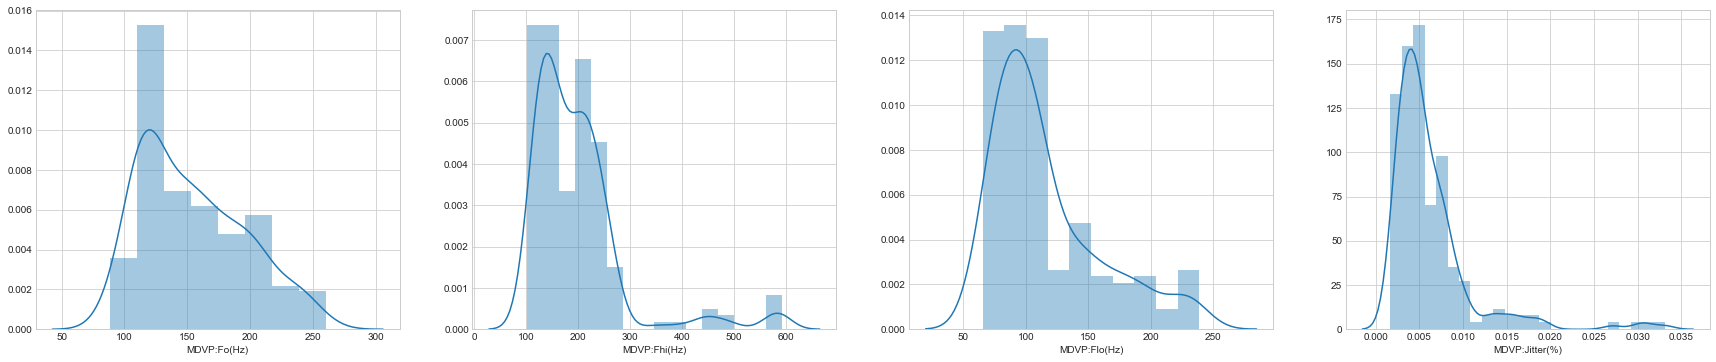

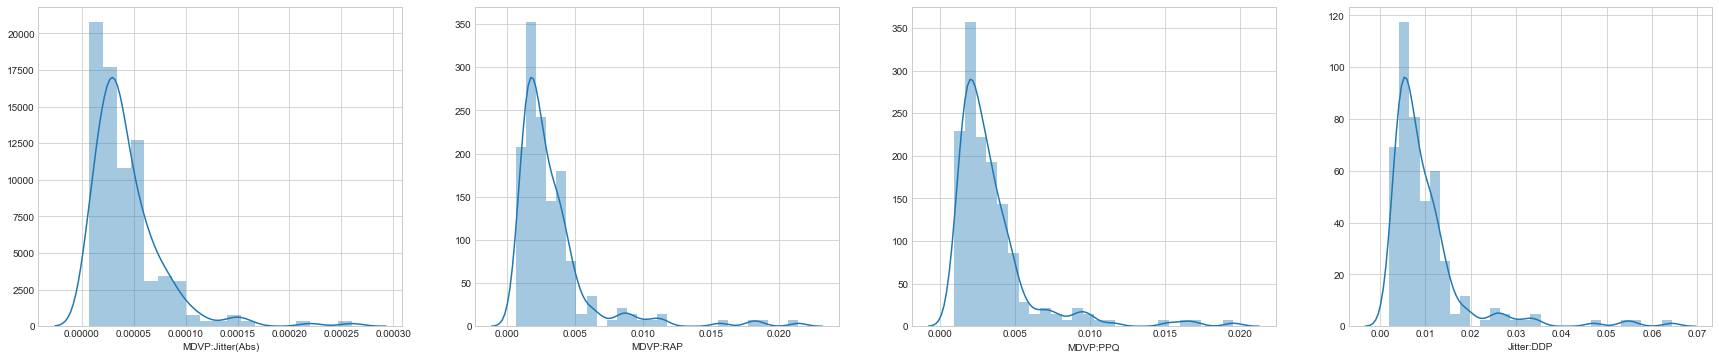

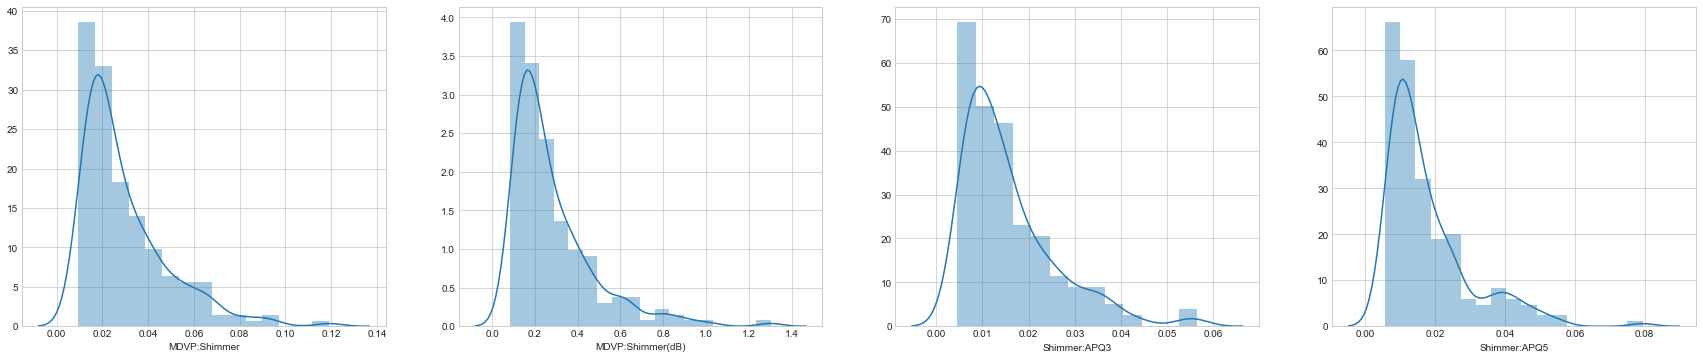

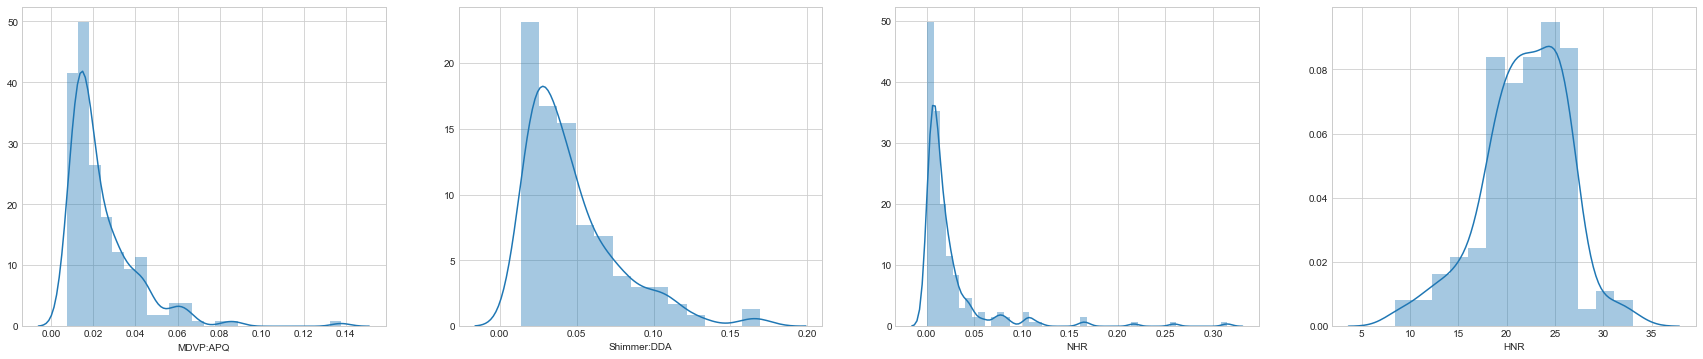

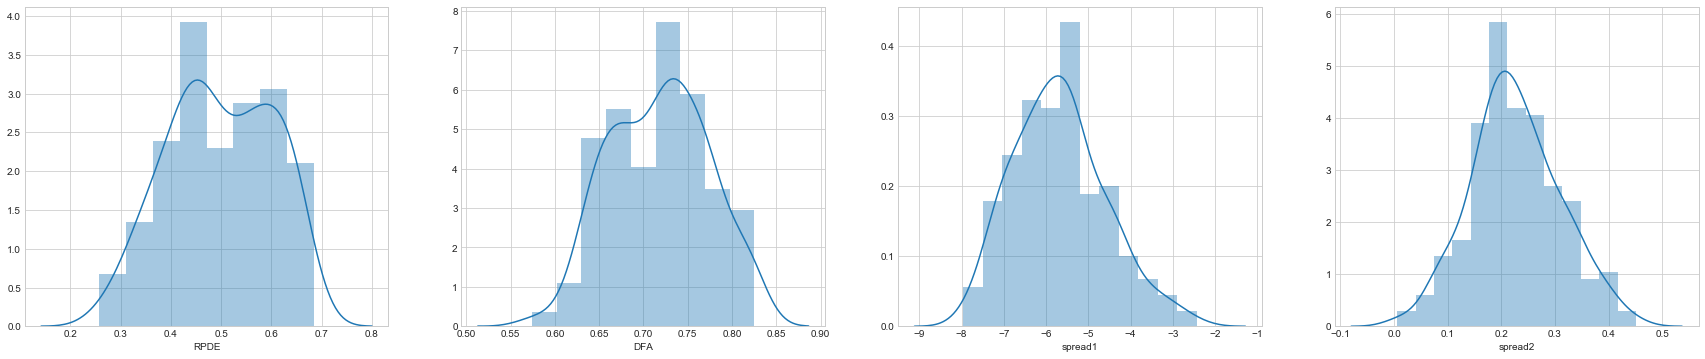

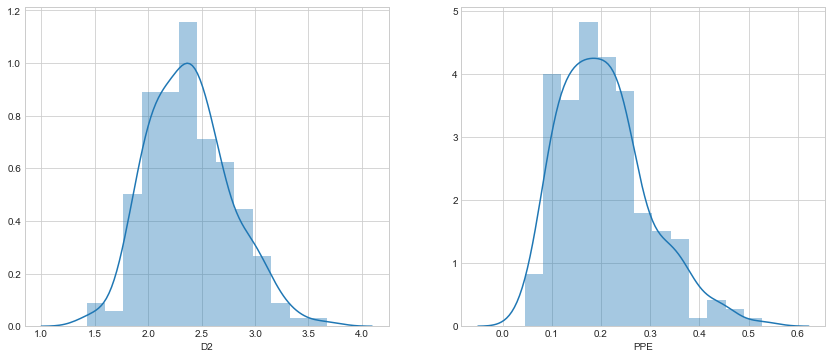

In [11]:
pos = 1    # a variable to manage the position of the subplot in the overall plot
for feature in predictors.columns:   # for-loop to iterate over every attribute whose distribution is to be visualized
    if pos == 1:
        plt.figure(figsize= (30,20))  # Set the figure size
        
    plt.subplot(3, 4, pos)   # plot grid
    sns.distplot(predictors[feature], kde= True )
    pos += 1  # to plot over the grid one by one  
    if pos > 4:
        pos = 1

- Feature <b>MDVP:Fo(Hz)</b> is right skewed and there is no extreme/outlier value. Most of values are between 125 to 150. Mean is very close to median.
- Features <b>MDVP:Fhi(Hz), MDVP:Flo(Hz), MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA, NHR, PPE</b> are right skewed and there are outlier values.
- Feature <b>HNR</b> is left skewed and there are outlier values.
- Features <b>RPDE, DFA</b> are left skewed and there is no outlier value.
- Features <b>spread1, spread2, D2</b> looks normally distributed but thee are few outlier values.

In [12]:
# Create a function that returns a Pie chart and a Bar Graph for the categorical variables:
def cat_view(x = 'Education'):
    """
    Function to create a Bar chart and a Pie chart for categorical variables.
    """
    from matplotlib import cm
    color1 = cm.inferno(np.linspace(.4, .8, 30))
    color2 = cm.viridis(np.linspace(.4, .8, 30))
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
     
    """
    Draw a Pie Chart on first subplot.
    """    
    s = data.groupby(x).size()

    mydata_values = s.values.tolist()
    mydata_index = s.index.tolist()

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}%\n({:d})".format(pct, absolute)


    wedges, texts, autotexts = ax[0].pie(mydata_values, autopct=lambda pct: func(pct, mydata_values),
                                      textprops=dict(color="w"))

    ax[0].legend(wedges, mydata_index,
              title="Index",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=12, weight="bold")

    ax[0].set_title(f'{x.capitalize()} Piechart')
    
    """
    Draw a Bar Graph on second subplot.
    """
    
    d = data['status'].value_counts()

    splot = ax[1].bar(x = d.index, height = d.values)

    for p in splot.patches:
        ax[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax[1].set_ylabel('Count')
    ax[1].set_title(f'Status Bar Graph')


    fig.tight_layout()
    plt.show()

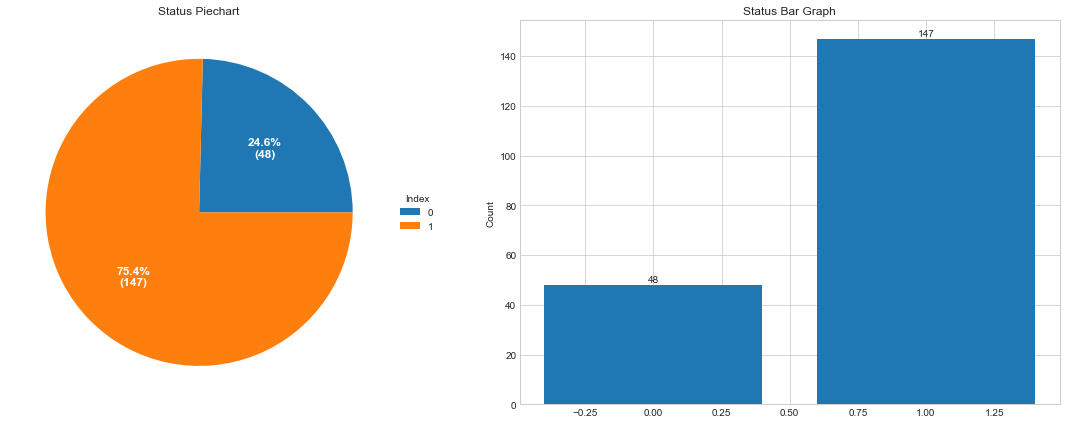

In [13]:
cat_view('status')

### 2.3.2 Multivariate Analysis

In [14]:
X = predictors
y = labels

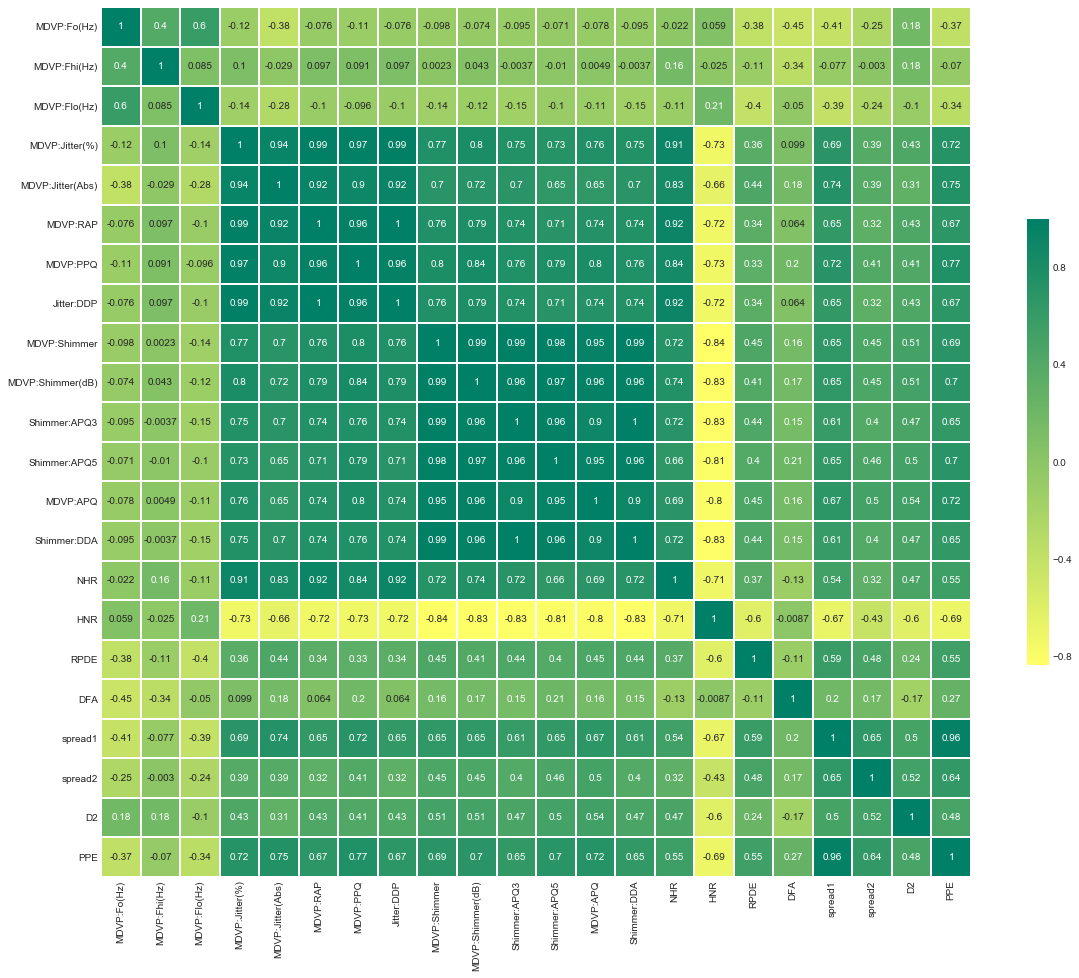

In [15]:
corr = X.corr()
plt.figure(figsize=(20,16))
g = sns.heatmap(corr, annot=True, cmap = 'summer_r', square=True, linewidth=1, cbar_kws={'fraction' : 0.02})
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

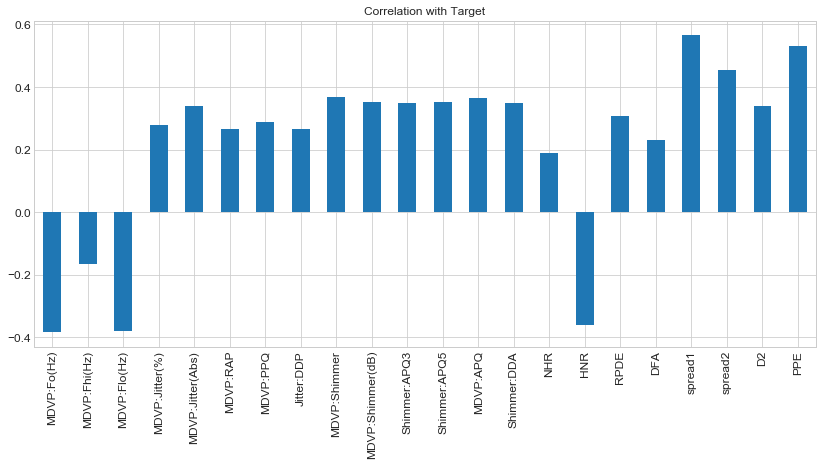

In [16]:
predictors.corrwith(data['status']).plot.bar(figsize = (14, 6), title = "Correlation with Target", fontsize = 12, rot = 90, grid = True)

In [17]:
# sns.pairplot(data)

# 3. Data Preprocessing
## 3.1 Train - Test Split

In [18]:
X = predictors
y = labels

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify = y)
X_train.shape

(136, 22)

## 3.2 Feature Importance

Text(0.5, 0, 'Relative Importance')

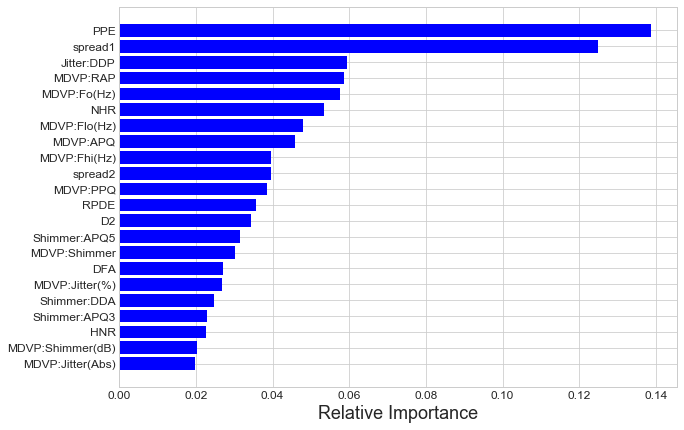

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rf_clf.fit(X_train, y_train)

features = list(X_train.columns)
importances = rf_clf.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 7))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize = 18)

## 3.3 PCA

In [21]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [22]:
cumsum

array([0.73442271, 0.94577117, 0.99816273, 0.99995414, 0.99999093,
       0.99999792, 0.99999904, 0.99999954, 0.9999998 , 0.99999991,
       0.99999996, 0.99999999, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [23]:
d

3

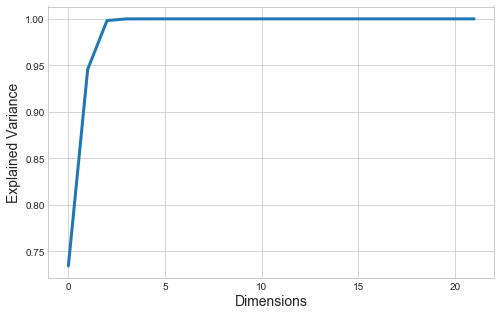

In [24]:
plt.figure(figsize=(8,5))
plt.plot(cumsum, linewidth=3)
plt.xlabel("Dimensions", fontsize = 14)
plt.ylabel("Explained Variance", fontsize = 14)
plt.grid(True)

plt.show()

In [25]:
X_train = X_train.values
y_train = y_train.values

In [26]:
X_train.shape

(136, 22)

In [27]:
y_train.shape

(136, 1)

In [28]:
y_train.dtype

dtype('int64')

In [29]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train_std = std.fit_transform(X_train)

In [30]:
pca = PCA(2)  # project from 64 to 2 dimensions
X_pca = pca.fit_transform(X_train_std)
print(X_train_std.shape)
print(X_pca.shape)

(136, 22)
(136, 2)


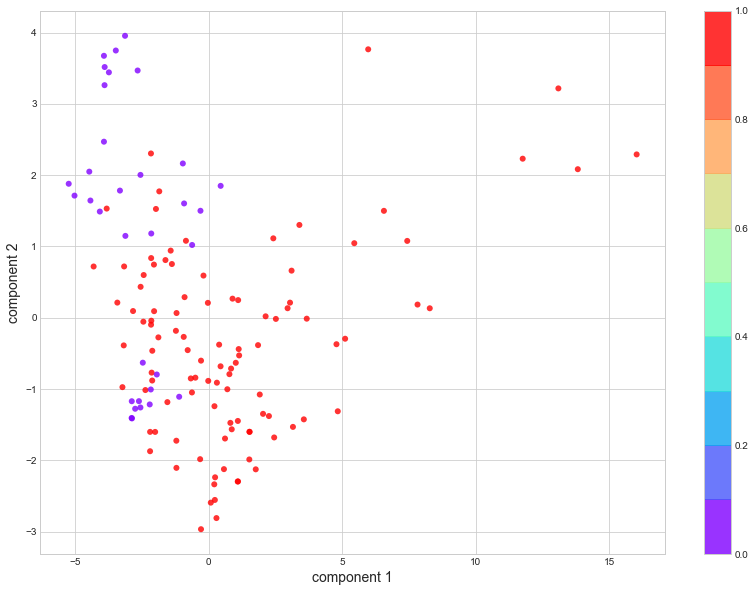

In [31]:
plt.figure(figsize=(14,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=y_train[:,0], edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('component 1', fontsize = 14)
plt.ylabel('component 2', fontsize = 14)
plt.colorbar();

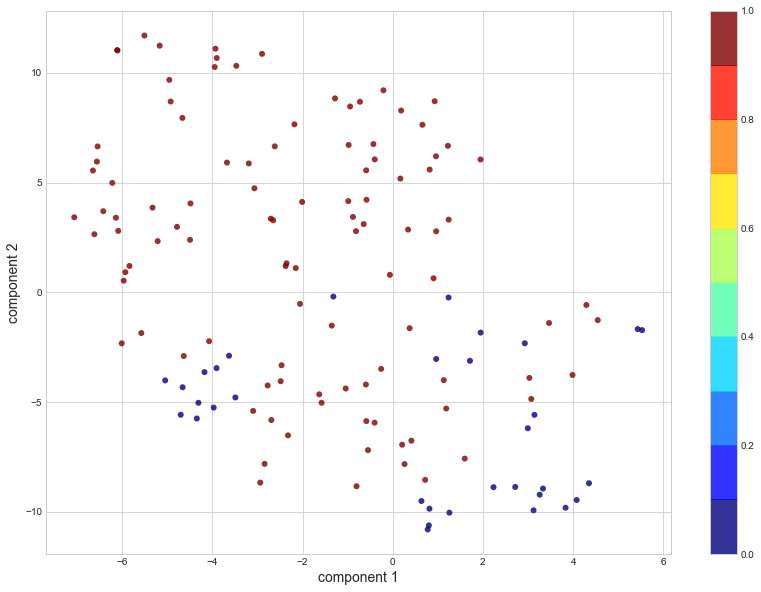

In [33]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train_std)

plt.figure(figsize=(14,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],
            c=y_train[:,0], edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap('jet', 10))
plt.xlabel('component 1', fontsize = 14)
plt.ylabel('component 2', fontsize = 14)
plt.colorbar()
plt.show()

## 3.4 Transformation Pipeline

In [38]:
from sklearn.pipeline import make_pipeline

transformer = make_pipeline(StandardScaler(), PCA(n_components=13))
X_train_std = transformer.fit_transform(X_train)

In [39]:
X_train_std[0]

array([-2.6115697 , -1.16903943,  1.13874625, -0.31757629, -0.04877178,
        0.39387941,  0.12608654, -0.55471292,  0.3823185 , -0.14082182,
       -0.1146827 , -0.57248887,  0.1739979 ])

# 4. Training Models

## 4.1 Training Individual Models

In [50]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


def train_model(model):
    m = model[1]
    y_train_pred = cross_val_predict(model[1], X_train_std, y_train, cv=5)
    cm = confusion_matrix(y_train, y_train_pred)
    print('Confusion matrix: ' + model[0])
    print(cm)
    print()
    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred)
    recall = recall_score(y_train, y_train_pred)
    f1 = f1_score(y_train, y_train_pred)
    
    return accuracy, precision, recall, f1

In [51]:
nb_accuracy, nb_recall, nb_precision, nb_f1_score = train_model(('Gaussian Naive Bayes', GaussianNB()))

Confusion matrix: Gaussian Naive Bayes
[[25  8]
 [14 89]]



In [52]:
lr_accuracy, lr_recall, lr_precision, lr_f1_score = train_model(('Logistic Regression', LogisticRegression(solver="liblinear")))

Confusion matrix: Logistic Regression
[[19 14]
 [ 9 94]]



In [53]:
sgd_accuracy, sgd_recall, sgd_precision, sgd_f1_score = train_model(('SGD Classifier', SGDClassifier(random_state=42)))

Confusion matrix: SGD Classifier
[[23 10]
 [16 87]]



In [54]:
knn_accuracy, knn_recall, knn_precision, knn_f1_score = train_model(('k Nearest Neighbor', KNeighborsClassifier(n_neighbors= 5, weights = 'distance' )))

Confusion matrix: k Nearest Neighbor
[[27  6]
 [ 7 96]]



In [55]:
svm_accuracy, svm_recall, svm_precision, svm_f1_score = train_model(('SVM Classifier', SVC(gamma = 'auto', kernel= 'poly', degree=2)))

Confusion matrix: SVM Classifier
[[ 14  19]
 [  1 102]]



In [56]:
result = pd.DataFrame({'Model' : ['Naive Bayes', 'Logistic Regression', 'SGD', 'KNN', 'SVM'],
                      'Accuracy': [ nb_accuracy ,  lr_accuracy, sgd_accuracy, knn_accuracy ,  svm_accuracy ],
                      'Recall' : [nb_recall ,  lr_recall, sgd_recall, knn_recall ,  svm_recall ],
                      'Precision': [nb_precision ,  lr_precision, sgd_precision, knn_precision ,  svm_precision ],
                      'F1 Score' : [nb_f1_score ,  lr_f1_score, sgd_f1_score, knn_f1_score ,  svm_f1_score]})
 
result.sort_values(by=['Accuracy', 'F1 Score'], axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

,Model,Accuracy,Recall,Precision,F1 Score
3,KNN,0.904412,0.941176,0.932039,0.936585
4,SVM,0.852941,0.842975,0.990291,0.910714
0,Naive Bayes,0.838235,0.917526,0.864078,0.890000
1,Logistic Regression,0.830882,0.870370,0.912621,0.890995
2,SGD,0.808824,0.896907,0.844660,0.870000


## 4.2 Training a Meta - Classifier

In [57]:
from sklearn.model_selection import GridSearchCV

class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=3, n_jobs=3, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

models1 = {
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'SVC': SVC()
}

params1 = {
    'ExtraTreesClassifier': { 'n_estimators': [16, 32] },
    'RandomForestClassifier': { 'n_estimators': [16, 32] },
    'AdaBoostClassifier':  { 'n_estimators': [16, 32] },
    'GradientBoostingClassifier': { 'n_estimators': [16, 32], 'learning_rate': [0.8, 1.0] },
    'SVC': [
        {'kernel': ['linear'], 'C': [1, 10]},
        {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]},
    ]
}

In [64]:
helper1 = EstimatorSelectionHelper(models1, params1)
helper1.fit(X_train_std, y_train, scoring='f1', n_jobs=-1)

Running GridSearchCV for ExtraTreesClassifier.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for RandomForestClassifier.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for AdaBoostClassifier.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for GradientBoostingClassifier.
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Running GridSearchCV for SVC.
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.0s finished


In [66]:
helper1.score_summary(sort_by='mean_score')

ExtraTreesClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
SVC


,estimator,min_score,mean_score,max_score,std_score,C,gamma,kernel,learning_rate,n_estimators
0,ExtraTreesClassifier,0.90411,0.93047,0.944444,0.0186512,NaN,NaN,NaN,NaN,16
2,RandomForestClassifier,0.906667,0.929163,0.957746,0.0212927,NaN,NaN,NaN,NaN,16
1,ExtraTreesClassifier,0.906667,0.92645,0.941176,0.0145353,NaN,NaN,NaN,NaN,32
4,AdaBoostClassifier,0.84058,0.913416,0.955224,0.0516907,NaN,NaN,NaN,NaN,16
3,RandomForestClassifier,0.88,0.908097,0.925373,0.0200418,NaN,NaN,NaN,NaN,32
14,SVC,0.88,0.905415,0.929577,0.0202593,10,0.001,rbf,NaN,NaN
11,SVC,0.84507,0.893941,0.944444,0.0405857,10,NaN,linear,NaN,NaN
5,AdaBoostClassifier,0.84375,0.891579,0.957746,0.0483118,NaN,NaN,NaN,NaN,32
8,GradientBoostingClassifier,0.84375,0.891567,0.916667,0.033826,NaN,NaN,NaN,1,16
7,GradientBoostingClassifier,0.825397,0.890547,0.929577,0.0463687,NaN,NaN,NaN,0.8,32
